# Data Analysis Report of SapJam Topic "ChatBot"
Dataset file: 2800 articles crawled from SapJam by Python Scrapy and Splash

In [1]:
from sqlalchemy import create_engine, distinct
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import func

from JamScrapy import config
from JamScrapy.preprocess.entity import Post, People, Group
from utility import plt_pie

In [2]:
KEYWORD = 'chatbot'

In [3]:
engine = create_engine(config.DB_CONNECT_STRING, max_overflow=5)
session = sessionmaker(bind=engine)()
results = engine.execute(f"SELECT * FROM spider_jam_post WHERE body IS NOT NULL AND keyword = '{KEYWORD}'")
print('Total posts:', results.rowcount)

Total posts: 2798


# 1. Overview Jam Categories of Topic "ChatBot"

In [4]:
urls = []
for p in results:
    # get post baseurl
    urls.append(p.baseurl.replace('http://jam4.sapjam.com/','').split('/')[0])
    
#print(urls)

urls_set = set(urls)
pie = {}
for item in urls_set:
    pie[item] = urls.count(item)
    
print(len(pie))    
print(pie)

10
{'groups': 2224, 'tasks': 1, 'poll': 3, 'feed': 131, 'ideas': 9, 'profile': 19, 'questions': 10, 'discussions': 11, 'blogs': 266, 'wiki': 124}


Most posts from 'groups': 2224, including 'documents' of 'groups': 2175 (97.8%)

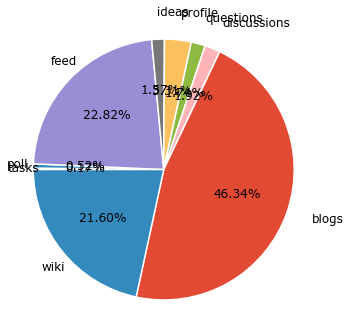

In [5]:
if 'groups' in pie:
    pie.pop('groups')
    
values = []
labels = []
for key in pie:
    if int(pie[key]) > 0:
        values.append(int(pie[key]))
        labels.append(key)
        
plt_pie(values, labels)

# 2. Entity Extraction of People

In [6]:
engine = create_engine(config.DB_CONNECT_STRING, max_overflow=5)
session = sessionmaker(bind=engine)()
people = session.query(People).filter(People.keyword == KEYWORD).all()

print('total of', len(people), 'including 2 roles of [Creator] and [Participator]')

total of 6323 including 2 roles of [Creator] and [Participator]


## 2.1 People perform as Creator

In [7]:
results = engine.execute(f'''select displayname, COUNT(displayname) as count from jam_people_from_post 
where roletype = 'creator' AND keyword = '{KEYWORD}' GROUP BY displayname order by count desc, displayname''').fetchall()
print('Distinct Creators:', len(results))

Distinct Creators: 1088


In [8]:
for r in results:
    if r[1] >= 5:
        print(r[0], ':', r[1])

Alumni : 234
Dante Alipio Jr : 46
Mathias Neid : 42
Geraldine Lim : 34
Dirk Kansky : 27
Alfred Wu : 20
Stephanie Muench : 19
Al Hilwa : 18
Susan Crawford : 15
Michael Laux : 14
Alain Dumas : 13
Ashutosh Uday Apte : 13
Gretchen Statler : 13
Regina Mattukat : 13
Sarah Kellman : 13
Steve Hamrick : 13
Kathleen O\'Brien : 12
Sina Moser : 12
Gail Moody-Byrd : 11
Jeff ALLEN : 11
Shanker Supramaniam : 11
Vicki Cui : 11
Wolfgang Bremer : 11
Carmelo Jr Villanueva : 10
Lisa Munzenmaier : 10
Renee Wilhelm : 10
Anna Sahagun : 9
Joni Wong Angkasa : 9
Kristin McMahon : 9
Marcel Lindsay : 9
Michael Renz : 9
Minal Shah : 9
Nam Ho Lee : 9
Raghav S : 9
Rosa Chamorro : 9
Charles Tigges : 8
Frank Godeby : 8
Gena Moore : 8
Jonas Israel : 8
Markus Meisl : 8
Milja Gillespie : 8
Pavel Balan : 8
Sarah BAILLOT : 8
Stephan Kamps : 8
Arunima Kumar : 7
ERICA VIALARDI : 7
Fernando Sanchez-Mayoral : 7
Francis Lui : 7
Joerg Fuetterer : 7
Jorge Granada : 7
Kirsten Zuercher : 7
Morgan Jiang : 7
Nadine Glasstetter : 7
Oa

## 2.2 People perform as Participator

In [9]:
results = engine.execute(f'''select displayname, COUNT(displayname) as count from jam_people_from_post 
where roletype = 'participator' AND position <> -1 AND keyword = '{KEYWORD}' GROUP BY displayname order by count desc, displayname''').fetchall()
print('Distinct Participators:', len(results))

Distinct Participators: 459


In [10]:
for r in results:
    if r[1] >= 5:
        print(r[0], ':', r[1])

Alumni : 37
Kathleen O\'Brien : 21
Julien Grisha Quester-Semeon : 20
Thomas Brodkorb : 14
Eric Cholankeril : 11
Jacky Cheng : 9
Jim Smith : 9
Magen Mintchev : 9
Charl Gokbayrak : 8
Dante Alipio Jr : 8
Nikolay Dimitrov : 8
CLARA FAVILLA : 7
Cristina Ricaurte : 7
Florian Albrecht : 7
Lynsey Turnbull : 7
Marlyn Zelkowitz : 7
Wendy Peacock : 7
Geoffrey Mantel : 6
Ji-Hyun Ahn : 6
Akash Winny : 5
Bart Mooren : 5
Bernhard Luecke : 5
Ginger Gatling : 5
Joseph Wong : 5
Kelsey Bourque : 5
Lee Barnard : 5
Lisa Munzenmaier : 5
Maksimiliana Lazarova : 5
Melissa Rittenhouse : 5
Tracy Rodgers : 5


# 3. Entity Extraction of Group

In [11]:
#groups = session.query(distinct(Group.groupname).label('groupname')).order_by(Group.membercount.desc()).all()
results = engine.execute(f"select distinct groupname, membercount from jam_group_from_post where keyword = '{KEYWORD}' order by membercount desc").fetchall()
print('Total Group:', len(results))

Total Group: 28


In [12]:
for r in results:
    if r[1] >= 10:
        print(r[0], ':', r[1])

Machine Learning : 7435
SAP Hybris Sales & Service : 5160
SAP Leonardo Presales & Services : 2786
SAP Hybris Industry Solutions : 2572
SAP Innovation Center Network : 2329
SAP Silicon Valley : 2114
Planet Sports & Entertainment : 1519
SAP Hybris Solution Hub Content : 984
Conversational AI: Chatbots, Digital Assistants & NLP at SAP : 758
Machine Learning Enablement Content : 727
IT Application Services : 265
Corporate Development: M&A at SAP : 154
ICN Showcases : 97
Machine Learning Foundation @ IT Services : 95
Innovation Challenge: Artificial Intelligence in Procurement : 84
SAP Hybris Consumer Products Goods Sales Play : 65
SAP Hybris Service Cloud Sales Play : 64
VT@United States : 61
SAP SuccessFactors Digital Assistant : 54
SAP Run Live Truck Demos : 47
INNO~WAH : 46
SAP Mobile Services AWS Work : 40
SIBOS 2017 : 35
Partner Solutions for Discrete Manufacturing : 24
SAP Hybris for Travel Industry Sales Play : 24
Collaboration : 16
CEC Solution Hub Test Group : 10


# 4. Statistic of Posts

In [13]:
query = engine.execute(f"select count(id) as posts, sum(comments) as comments, sum(likes) as likes, sum(views) as views from jam_post where keyword = '{KEYWORD}'")
redundance_comments = engine.execute(f"select count(id) as count from jam_people_from_post where position = -1 AND keyword = '{KEYWORD}'")

In [14]:
statis = query.first()
print("total posts:", statis.posts)
print("total comments:", statis.comments-redundance_comments.first().count)
print("total likes:", statis.likes)
print("total views:", statis.views)

total posts: 2605
total comments: 522
total likes: 2471
total views: 430144


# 5. Statistic of People Contribution

In [15]:
query = engine.execute(f"select author, count(id) as posts, sum(ifnull(comments,0)) as comments, sum(ifnull(likes,0)) as likes, sum(views) as views from jam_post "
                       f"where keyword = '{KEYWORD}' and author <> 'Alumni' group by author order by posts desc, comments desc, likes desc, views desc")

In [16]:
from pandas import DataFrame
import numpy as np

df = DataFrame(query.fetchall())
df.columns = query.keys()

df['posts'] = df['posts'].astype('int')
df['comments'] = df['comments'].astype('int')
df['likes'] = df['likes'].astype('int')
df['views'] = df['views'].astype('int')

In [17]:
print(df.index)
print(df.columns)
print(df.shape)

df.describe(exclude=[np.object]).astype(np.int64).T

RangeIndex(start=0, stop=1044, step=1)
Index(['author', 'posts', 'comments', 'likes', 'views'], dtype='object')
(1044, 5)


,count,mean,std,min,25%,50%,75%,max
posts,1044,2,3,1,1,1,2,46
comments,1044,2,3,0,1,1,3,47
likes,1044,1,6,0,0,0,1,78
views,1044,373,6332,0,12,31,89,203464


In [18]:
df = df[(True^df['views'].isin([203464,15522]))]
df = df[df['posts']>=5]
df.describe(exclude=[np.object]).astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
posts,109,8,6,5,5,6,9,46
comments,109,9,6,0,6,7,9,47
likes,109,5,10,0,0,1,7,73
views,109,569,1026,25,82,176,731,8067


## 5.1 Visualize Posts

In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np

df['posts'] = df['posts'].astype('float64')
df['comments'] = df['comments'].astype('float64')
df['likes'] = df['likes'].astype('float64')
df['views'] = df['views'].astype('float64')

#normfun正态分布函数，mu: 均值，sigma:标准差，pdf:概率密度函数，np.exp():概率密度函数公式
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

def norm_generate(dataset):
    x = np.arange(dataset.min(), dataset.max(),1)
    y = normfun(x, dataset.mean(), dataset.std())
    return x, y

plt.hist(x, bins= 10, range= None, normed= False, weights= None, cumulative= False, bottom= None, histtype= 'bar', align= 'mid', orientation= 'vertical', rwidth= None, log= False, color= None, label= None, stacked= False)

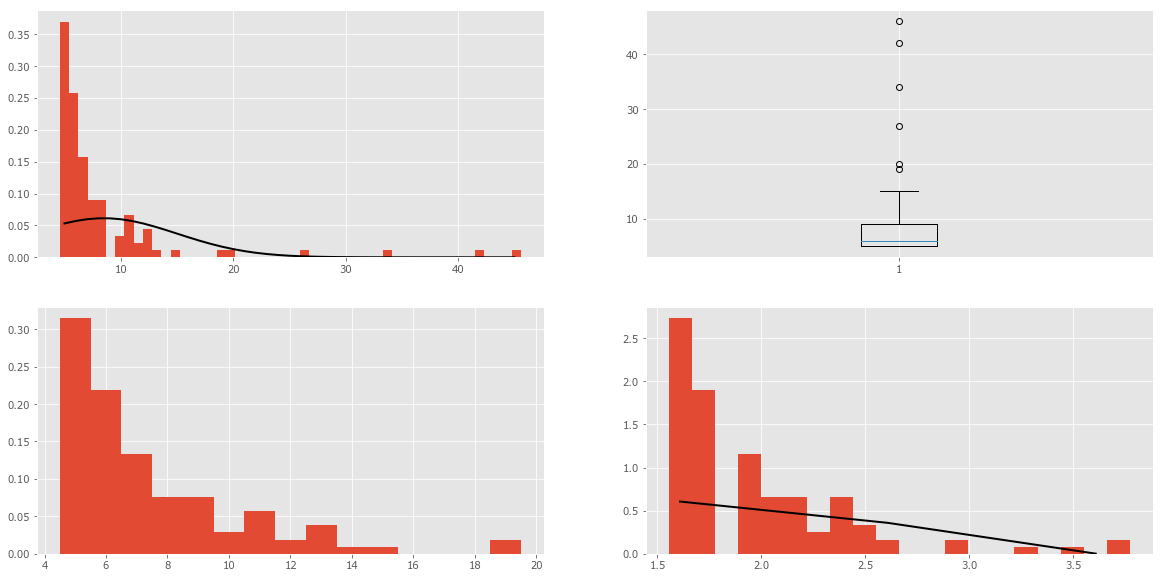

In [20]:
posts = df['posts']
df['posts_trans'] = np.log(df['posts'])
posts_trans = df['posts_trans']

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.hist(posts, bins=50, align='left', normed=True)
x,y = norm_generate(posts)
ax1.plot(x,y, color='black',linewidth = 2)

ax2.boxplot(posts)
ax3.hist(posts, bins=15, range=[5,20], align='left', normed=True) 
ax4.hist(posts_trans, bins=20, align='left', normed=True)

x,y = norm_generate(posts_trans)
ax4.plot(x,y, color='black',linewidth = 2)

plt.show()

## 5.2 Visualize Comments

/Users/i345795/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/i345795/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


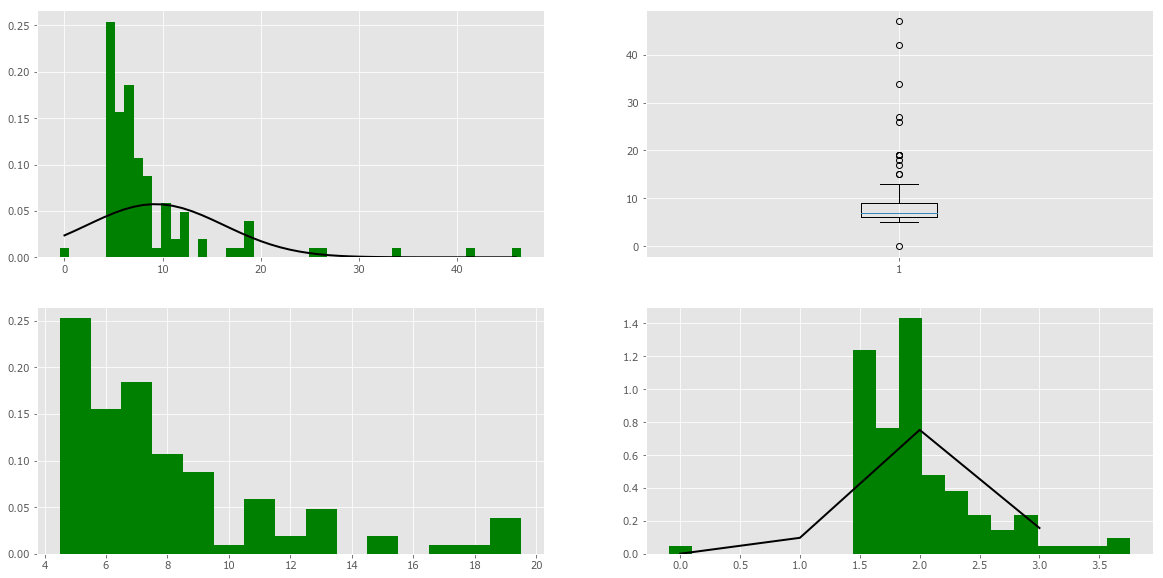

In [21]:
comments = df['comments']
df['comments_trans'] = np.log(df['comments'])
comments_trans = df['comments_trans']
comments_trans[np.isinf(comments_trans)] = 0

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.hist(comments, bins=50, align='left', normed=True, color='g')
x,y = norm_generate(comments)
ax1.plot(x,y, color='black',linewidth = 2)

ax2.boxplot(comments)
ax3.hist(comments, bins=15, range=[5,20], align='left', normed=True, color='g') 
ax4.hist(comments_trans, bins=20, align='left', normed=True, color='g')

x,y = norm_generate(comments_trans)
ax4.plot(x,y, color='black',linewidth = 2)

plt.show()

## 5.3 Visualize Likes

/Users/i345795/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/i345795/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


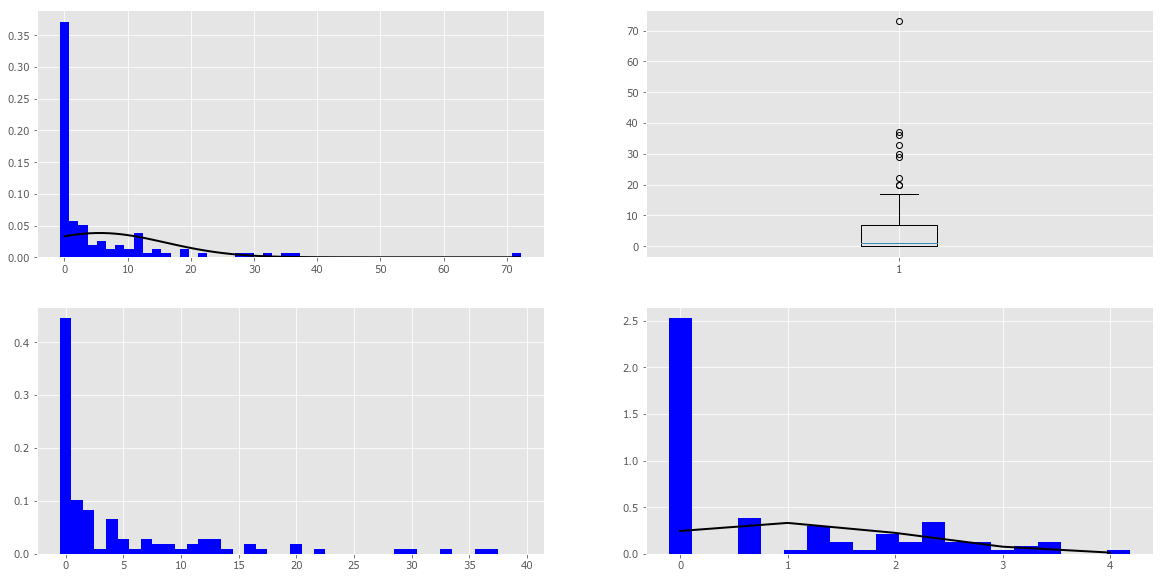

In [22]:
likes = df['likes']
df['likes_trans'] = np.log(df['likes'])
likes_trans = df['likes_trans']
likes_trans[np.isinf(likes_trans)] = 0

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.hist(likes, bins=50, align='left', normed=True, color='b')
x,y = norm_generate(likes)
ax1.plot(x,y, color='black',linewidth = 2)

ax2.boxplot(likes)
ax3.hist(likes, bins=40, range=[0,40], align='left', normed=True, color='b') 
ax4.hist(likes_trans, bins=20, align='left', normed=True, color='b')

x,y = norm_generate(likes_trans)
ax4.plot(x,y, color='black',linewidth = 2)

plt.show()

## 5.4 Visualize Views

/Users/i345795/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


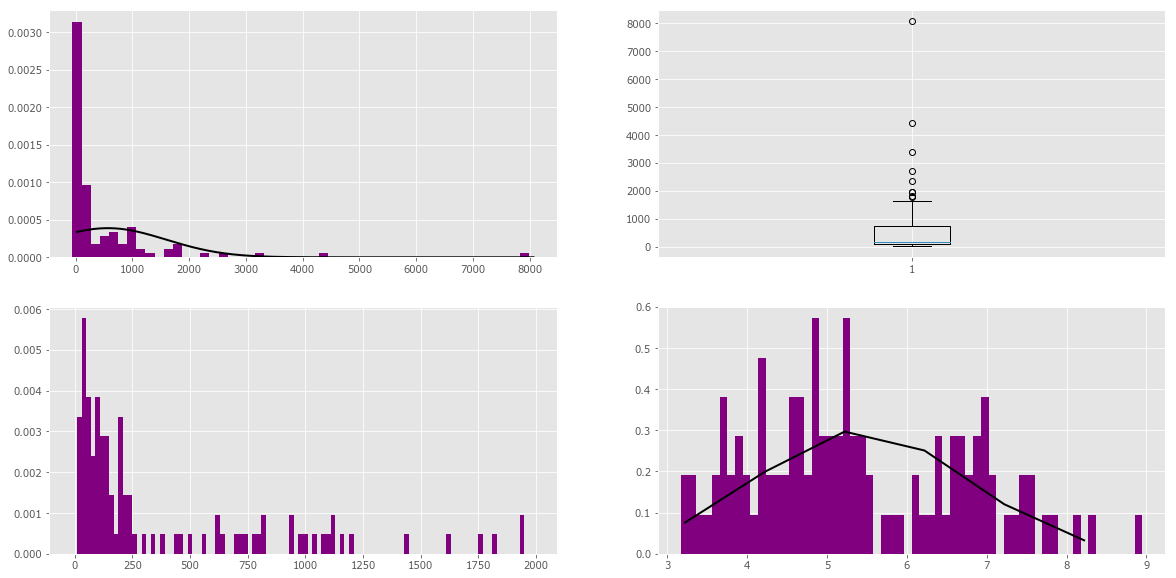

In [23]:
views = df['views']
df['views_trans'] = np.log(df['views'])
views_trans = df['views_trans']
views_trans[np.isinf(views_trans)] = 0

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.hist(views, bins=50, align='left', normed=True, color='purple')
x,y = norm_generate(views)
ax1.plot(x,y, color='black',linewidth = 2)

ax2.boxplot(views)
ax3.hist(views, bins=100, range=[0,2000], align='left', normed=True, color='purple') 
ax4.hist(views_trans, bins=60, align='left', normed=True, color='purple')

x,y = norm_generate(views_trans)
ax4.plot(x,y, color='black',linewidth = 2)

plt.show()

## 5.5 Contribution Credit & Grade

In [24]:
#print(df.loc[:,['posts_trans','comments_trans','likes_trans','views_trans']])

In [25]:
df['contribution'] = 0
weights = {'posts': 12.0, 'comments': 8.0, 'likes': 4.0, 'views': 2.0}
for key in df.columns:
    if key in weights:
        df['contribution'] += df[key+'_trans']*weights[key]

#print(df.loc[:,['posts_trans','comments_trans','likes_trans','views_trans','contribution']])

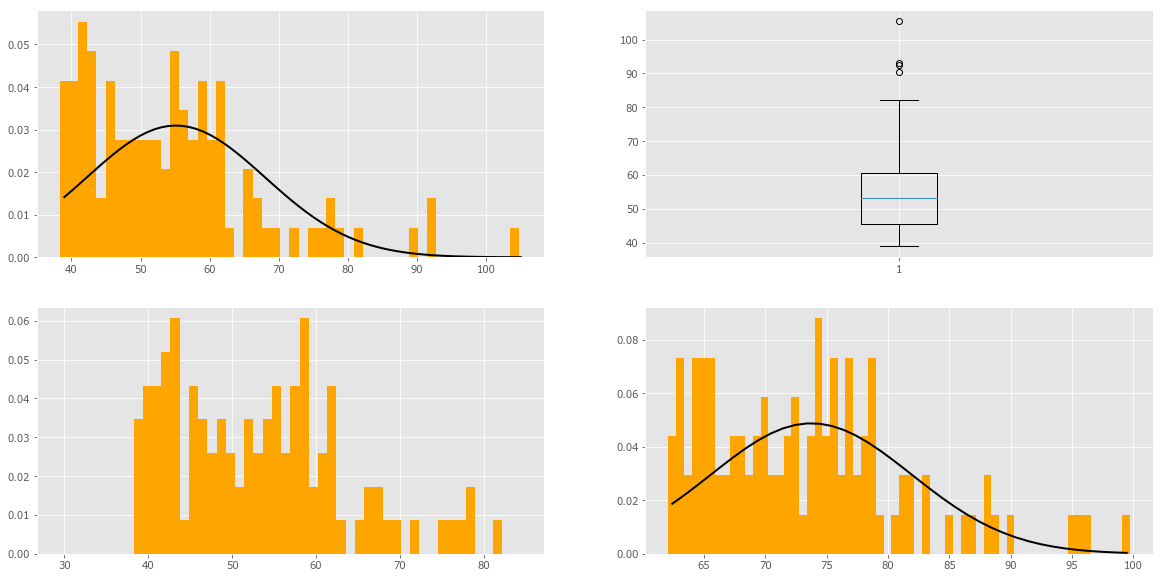

In [26]:
contribution = df['contribution']
contribution_perc = np.sqrt(contribution)*10.0
contribution_perc[contribution_perc>100]=100
                                                        
fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.hist(contribution, bins=50, align='left', normed=True, color='orange')
x,y = norm_generate(contribution)
ax1.plot(x,y, color='black',linewidth = 2)

ax2.boxplot(contribution)
ax3.hist(contribution, bins=50, range=[30,85], align='left', normed=True, color='orange') 
ax4.hist(contribution_perc, bins=60, align='left', normed=True, color='orange')

x,y = norm_generate(contribution_perc)
ax4.plot(x,y, color='black',linewidth = 2)

plt.show()

In [27]:
df['contribution'] = contribution_perc
threshold2 = contribution_perc.max() - 2*contribution_perc.std()
threshold3 = contribution_perc.max() - 3*contribution_perc.std()

print('threshold:', threshold2, threshold3)

df = df.sort_values(['contribution'], ascending = [False]) 

print('length 2σ:', len(df[df['contribution']>=threshold2]), 'of' ,len(df))
print('length 3σ:', len(df[df['contribution']>=threshold3]), 'of' ,len(df))

print(df[df['contribution']>=threshold3].loc[:,['author','contribution']])

threshold: 83.64091137708455 75.46136706562683
length 2σ: 11 of 109
length 3σ: 41 of 109
                     author  contribution
0           Dante Alipio Jr    100.000000
4                 Alfred Wu     96.435933
2             Geraldine Lim     96.135320
1              Mathias Neid     95.089743
12               Sina Moser     90.566706
20         Lisa Munzenmaier     88.932255
23                 Al Hilwa     88.611919
21            Renee Wilhelm     88.215569
14                Vicki Cui     87.355184
3               Dirk Kansky     86.687357
7           Regina Mattukat     85.253292
39              Phoebe Poon     83.518708
13        Kathleen O\'Brien     83.378686
5          Stephanie Muench     82.460011
15             Michael Laux     82.285728
53            Stephan Kamps     81.764253
24               Minal Shah     81.486382
43  Deborah Cholmeley-Jones     81.028112
76              Erin McHugh     79.836895
8             Sarah Kellman     79.220696
81           Ramona Gattner  

In [28]:
print(df.index)
print(df.columns)
print(df.shape)

df.describe(exclude=[np.object]).astype(np.int64).T

df.to_csv(path_or_buf=f'./output/contributes-{KEYWORD}.csv')

Int64Index([  0,   4,   2,   1,  12,  20,  23,  21,  14,   3,
            ...
            100, 101, 102, 103, 104, 105,  94, 106, 107, 108],
           dtype='int64', length=109)
Index(['author', 'posts', 'comments', 'likes', 'views', 'posts_trans',
       'comments_trans', 'likes_trans', 'views_trans', 'contribution'],
      dtype='object')
(109, 10)


# 6. Knowledge Entities Exactration

In [51]:
query = engine.execute(f"select * from jam_knowledge where keyword = '{KEYWORD}'").fetchall()

In [52]:
title_list = []
abstract_list = []

for p in query:
    if p.title:
        title_list.extend(p.title.split(' '))
    
    if p.abstract:
        abstract_list.extend(p.title.split(' '))

print(len(title_list))
print(len(abstract_list))

remove_chars = ['+','–',',','&','/','?','-','SAP','and','for','the','in','of',
                'a','to','with','comment','wrote','The','at','','|','by','on','from']

title_list = list(filter(lambda x: x not in remove_chars, title_list))
abstract_list = list(filter(lambda x: x not in remove_chars, abstract_list))
    
print(len(title_list))
print(len(abstract_list))


15245
14634
12154
11714


In [53]:
import operator
from collections import Counter

entities_title = dict(zip(*np.unique(title_list, return_counts=True)))
sorted_titles = sorted(entities_title.items(), key = lambda x:x[1], reverse = True)

print({k: v for k, v in dict(sorted_titles).items() if v >= 5})

{'2017': 242, 'Hybris': 136, 'Digital': 132, 'Banking': 76, '2018': 73, 'Learning': 70, 'Innovation': 66, 'Leonardo': 65, 'Chatbot': 61, 'Machine': 60, 'Service': 60, 'HR': 58, 'Cloud': 54, 'News': 51, 'Conversational': 49, 'AI': 47, 'Chatbots': 46, 'Industry': 46, 'Overview': 46, 'Engagement': 45, 'Customer': 43, 'Update': 43, 'Center': 39, 'Demo': 38, 'Business': 35, 'Presentation': 35, 'CMI': 34, 'Technology': 34, 'Platform': 33, 'Intelligence': 32, 'Meeting': 32, 'Services': 32, 'Strategy': 32, 'SAPPHIRE': 31, 'Sales': 30, 'Top': 28, '2016': 27, '2017.pptx': 27, 'Market': 27, 'Day': 26, 'Deep': 25, 'ESC29': 25, 'How': 24, 'Project': 24, 'Q3': 24, 'Trends': 24, 'Competitor': 23, 'Solution': 23, 'Transformation': 23, 'Bot': 22, 'Enterprise': 22, 'ML': 22, 'Marketing': 22, 'NOW': 22, '2017.pdf': 21, 'Ariba': 21, 'IT': 21, '.pptx': 20, 'Agenda': 20, 'Experience': 20, 'FSI': 20, 'Social': 20, 'SuccessFactors': 20, 'your': 20, 'A': 19, 'Artificial': 19, 'Audience': 19, 'S4HC': 19, 'Silic

In [54]:
entities_abstract = dict(zip(*np.unique(abstract_list, return_counts=True)))
sorted_abstracts = sorted(entities_abstract.items(), key = lambda x:x[1], reverse = True)

print({k: v for k, v in dict(sorted_abstracts).items() if v >= 5})

{'2017': 241, 'Hybris': 133, 'Digital': 131, 'Banking': 74, '2018': 73, 'Learning': 69, 'Innovation': 65, 'Leonardo': 65, 'Machine': 60, 'Service': 58, 'HR': 54, 'Cloud': 52, 'News': 51, 'Industry': 46, 'AI': 45, 'Conversational': 45, 'Engagement': 45, 'Overview': 45, 'Update': 43, 'Customer': 42, 'Center': 39, 'Chatbot': 38, 'Business': 35, 'CMI': 34, 'Technology': 34, 'Chatbots': 33, 'Presentation': 33, 'Meeting': 32, 'Platform': 32, 'Services': 32, 'Strategy': 32, 'Intelligence': 31, 'SAPPHIRE': 31, 'Sales': 30, 'Demo': 29, 'Top': 28, '2016': 27, '2017.pptx': 27, 'Market': 27, 'Day': 26, 'Deep': 25, 'ESC29': 25, 'Project': 24, 'Trends': 24, 'Competitor': 23, 'Q3': 23, 'Solution': 23, 'Transformation': 23, 'ML': 22, 'Marketing': 22, 'NOW': 22, '2017.pdf': 21, 'Ariba': 21, 'IT': 21, '.pptx': 20, 'Agenda': 20, 'Enterprise': 20, 'Experience': 20, 'FSI': 20, 'How': 20, 'Social': 20, 'Audience': 19, 'Bot': 19, 'S4HC': 19, 'Silicon': 19, 'Tech': 19, 'To': 19, 'Valley': 19, 'Artificial': 18

## Final Entities

In [63]:
entities = 'Chatbot Conversational Chat AI Leonardo Hybris Industry Intelligence CoPilot Recast.AI SAPPHIRE IDC SAP.iO CMI FSI ESC29 S-4HANA HanaHaus SANOW Bot S4HC ICD ICSV IoT TechEd FKOM Ariba Digital Banking Machine Learning Innovation Service HR Cloud Engagement Customer Center Demo Business Presentation Technology Platform Meeting Services Strategy Sales Top Market Trends Competitor Solution Transformation Enterprise ML Social SuccessFactors Artificial Audience Silicon Valley Omnichannel Oracle Tableau Financial Summit Activities Gartner Retail Perspective Analytics Competitive Deck Assistant Council Master Presales Big CEC Editorial Predictions Script Bootcamp Channels Community Development Education Enablement Executive FAQs Guide Highlights ICN Session Smart Story Utilities Campaign Coverage Hack Insights Messaging Newsletter Registration Architecture Intrapreneurship Investments Facebook Microsoft Mobile Campus'
entities_list = entities.split(' ')
print(entities_list)

['Chatbot', 'Conversational', 'Chat', 'AI', 'Leonardo', 'Hybris', 'Industry', 'Intelligence', 'CoPilot', 'Recast.AI', 'SAPPHIRE', 'IDC', 'SAP.iO', 'CMI', 'FSI', 'ESC29', 'S-4HANA', 'HanaHaus', 'SANOW', 'Bot', 'S4HC', 'ICD', 'ICSV', 'IoT', 'TechEd', 'FKOM', 'Ariba', 'Digital', 'Banking', 'Machine', 'Learning', 'Innovation', 'Service', 'HR', 'Cloud', 'Engagement', 'Customer', 'Center', 'Demo', 'Business', 'Presentation', 'Technology', 'Platform', 'Meeting', 'Services', 'Strategy', 'Sales', 'Top', 'Market', 'Trends', 'Competitor', 'Solution', 'Transformation', 'Enterprise', 'ML', 'Social', 'SuccessFactors', 'Artificial', 'Audience', 'Silicon', 'Valley', 'Omnichannel', 'Oracle', 'Tableau', 'Financial', 'Summit', 'Activities', 'Gartner', 'Retail', 'Perspective', 'Analytics', 'Competitive', 'Deck', 'Assistant', 'Council', 'Master', 'Presales', 'Big', 'CEC', 'Editorial', 'Predictions', 'Script', 'Bootcamp', 'Channels', 'Community', 'Development', 'Education', 'Enablement', 'Executive', 'FAQs'

In [64]:
title_list = list(filter(lambda x: x in entities_list, title_list))
print(' '.join(title_list))

Chatbot Sales Chatbot Chatbot Chatbot Chatbot Chatbot Chatbot Conversational Digital Chatbot Chatbot Chatbot Smart Chatbot Chatbot Conversational Chatbot AI Chatbot Chatbot Chatbot Smart Chatbot Chatbot Chatbot Summit Chatbot Chatbot Chatbot Chatbot Chatbot Conversational Chatbot Digital Technology Council Chatbot Meeting Chatbot Meeting Chatbot Chatbot Service Chatbot Chatbot Facebook Business Chatbot Facebook Business Chatbot Service Chatbot Chatbot Summit Chatbot AI HR Chatbot Demo SuccessFactors Demo Chatbot Demo SuccessFactors Insights Facebook Insights Chatbot Summit Conversational Conversational Center Enterprise HanaHaus Chatbot Chatbot Learning Insights Insights Chatbot Demo SuccessFactors Chatbot Story Enterprise Customer Insights Machine Financial Banking Conversational Chatbot Retail Chatbot HanaHaus Chatbot Chatbot Summit Chatbot Chatbot Chatbot Summit AI Facebook Chatbot Technology Campaign Coverage Enterprise Enterprise Enterprise Chatbot Summit Insights Facebook AI Cust